In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.style.use('ggplot')
from statistics import mean
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import scipy as sp
import scipy.stats as stats

from statsmodels.stats.proportion import proportions_ztest

In [3]:
ad_marital_status = pd.read_excel ('../Data/AD-by-marital-status.xls')

In [4]:
ad_marital_status.head(21)

,Pay Grade,Single Male,Single Female,Single Total,Single Parent Male,Single Parent Female,Single Parent Total,Joint Service Marriage Male,Joint Service Marriage Female,Joint Service Marriage Total,Civilian Married Male,Civilian Married Female,Civilian Married Total,Total Male,Total Female,Grand Total
0,E-1,31229,5717,36946,563,122,685,139,141,280,5060,719,5779,36991,6699,43690
1,E-2,53094,8388,61482,1457,275,1732,438,579,1017,12483,1682,14165,67472,10924,78396
2,E-3,131091,21019,152110,4264,1920,6184,3579,4902,8481,54795,6641,61436,193729,34482,228211
3,E-4,112710,16381,129091,9491,4662,14153,8661,9778,18439,105556,9961,115517,236418,40782,277200
4,E-5,57989,11021,69010,10937,6576,17513,12459,11117,23576,130944,8592,139536,212329,37306,249635
5,E-6,19125,4654,23779,10369,4962,15331,8474,6961,15435,110322,5827,116149,148290,22404,170694
6,E-7,5446,1913,7359,6530,2585,9115,5065,3291,8356,70001,3206,73207,87042,10995,98037
7,E-8,1009,438,1447,1786,513,2299,1423,651,2074,21079,820,21899,25297,2422,27719
8,E-9,381,202,583,579,144,723,458,150,608,8215,291,8506,9633,787,10420
9,TOTAL ENLISTED,412074,69733,481807,45976,21759,67735,40696,37570,78266,518455,37739,556194,1017201,166801,1184002


In [52]:
enlisted_df = ad_marital_status[:10]

In [53]:
officer_df = ad_marital_status[10:21]

In [54]:
warrant_df = ad_marital_status[21:27]

In [55]:
enlisted_df

,Pay Grade,Single Male,Single Female,Single Total,Single Parent Male,Single Parent Female,Single Parent Total,Joint Service Marriage Male,Joint Service Marriage Female,Joint Service Marriage Total,Civilian Married Male,Civilian Married Female,Civilian Married Total,Total Male,Total Female,Grand Total
0,E-1,31229,5717,36946,563,122,685,139,141,280,5060,719,5779,36991,6699,43690
1,E-2,53094,8388,61482,1457,275,1732,438,579,1017,12483,1682,14165,67472,10924,78396
2,E-3,131091,21019,152110,4264,1920,6184,3579,4902,8481,54795,6641,61436,193729,34482,228211
3,E-4,112710,16381,129091,9491,4662,14153,8661,9778,18439,105556,9961,115517,236418,40782,277200
4,E-5,57989,11021,69010,10937,6576,17513,12459,11117,23576,130944,8592,139536,212329,37306,249635
5,E-6,19125,4654,23779,10369,4962,15331,8474,6961,15435,110322,5827,116149,148290,22404,170694
6,E-7,5446,1913,7359,6530,2585,9115,5065,3291,8356,70001,3206,73207,87042,10995,98037
7,E-8,1009,438,1447,1786,513,2299,1423,651,2074,21079,820,21899,25297,2422,27719
8,E-9,381,202,583,579,144,723,458,150,608,8215,291,8506,9633,787,10420
9,TOTAL ENLISTED,412074,69733,481807,45976,21759,67735,40696,37570,78266,518455,37739,556194,1017201,166801,1184002


In [10]:
enlisted_df2 = enlisted_df.drop(columns=['Single Total', 'Joint Service Marriage Total', 'Single Parent Total', 'Civilian Married Total', 'Grand Total','Total Male', 'Total Female'])

In [11]:
enlisted_df3 = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])

In [12]:
officer_df = ad_marital_status[10:20]
officer_df3 = officer_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
single_total= officer_df3['Single Total'].values
single_parent_total = officer_df3['Single Parent Total'].values
joint_service_marriage_total= officer_df3['Joint Service Marriage Total'].values
civilian_married_total = officer_df3['Civilian Married Total'].values



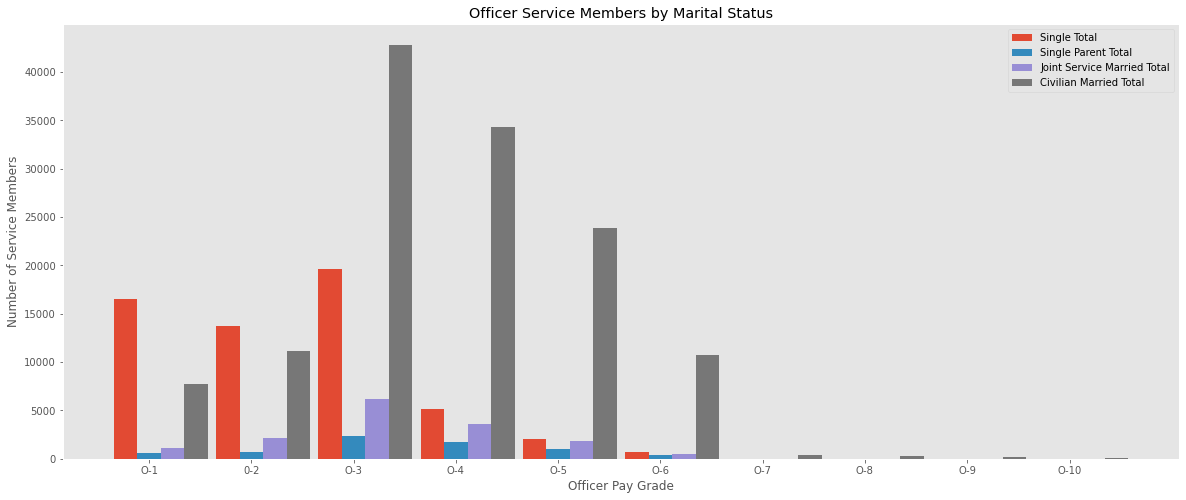

In [13]:
labels= ['O-1','0-2','O-3','O-4','O-5','O-6','O-7','O-8', 'O-9', 'O-10']

x=np.arange(len(labels))
width = 0.23

fig, ax = plt.subplots(figsize=(20,8)) 
rects1 = ax.bar(x, single_total ,width, label='Single Total')
rects2 = ax.bar(x+width,single_parent_total ,width, label='Single Parent Total')
rects3 = ax.bar(x+2*width,joint_service_marriage_total ,width, label='Joint Service Married Total')
ects4 = ax.bar(x+3*width, civilian_married_total ,width, label='Civilian Married Total')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
plt.xticks(x+width, labels)
plt.legend(loc="upper right")
plt.title('Officer Service Members by Marital Status')
plt.xlabel('Officer Pay Grade')
plt.ylabel('Number of Service Members')
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()



In [14]:
enlisted_df3 = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
single_total2= enlisted_df3['Single Total'].values
single_parent_total2 = enlisted_df3['Single Parent Total'].values
joint_service_marriage_total2= enlisted_df3['Joint Service Marriage Total'].values
civilian_married_total2 = enlisted_df3['Civilian Married Total'].values


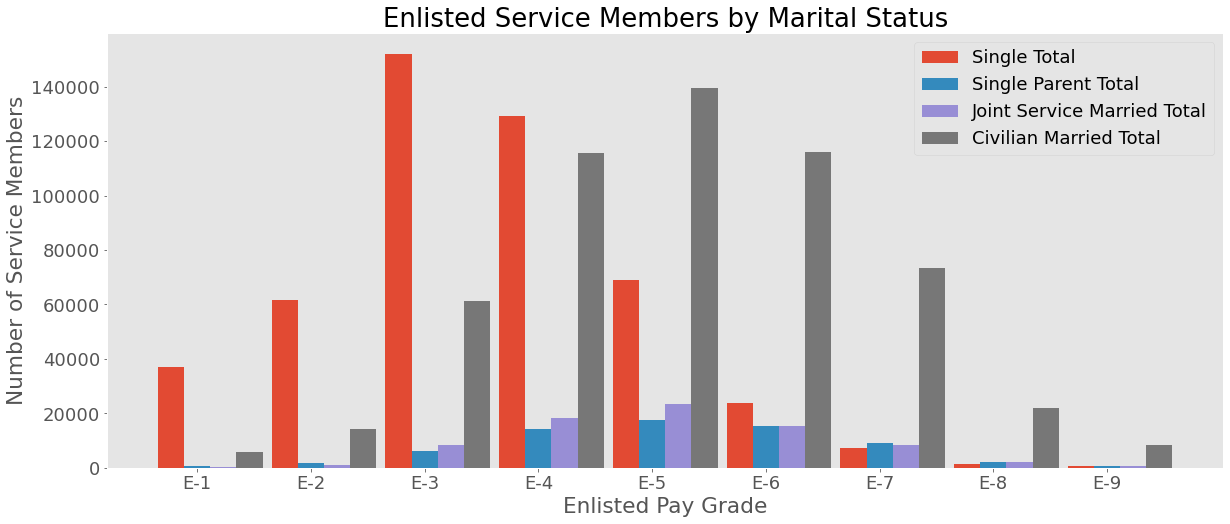

In [15]:
labels= ['E-1','E-2','E-3','E-4','E-5','E-6','E-7','E-8', 'E-9']

x=np.arange(len(labels))
width = 0.23

fig, ax = plt.subplots(figsize=(20,8)) 
rects1 = ax.bar(x, single_total2 ,width, label='Single Total')
rects2 = ax.bar(x+width, single_parent_total2 ,width, label='Single Parent Total')
rects3 = ax.bar(x+2*width, joint_service_marriage_total2 ,width, label='Joint Service Married Total')
ects4 = ax.bar(x+3*width, civilian_married_total2 ,width, label='Civilian Married Total')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
plt.xticks(x+width, labels)
plt.legend(loc="upper right")
plt.title('Enlisted Service Members by Marital Status')
plt.xlabel('Enlisted Pay Grade')
plt.ylabel('Number of Service Members')
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()


In [16]:
enlisted_df.set_index('Pay Grade')
df = enlisted_df.set_index('Pay Grade')
df['Total Married'] = enlisted_df['Joint Service Marriage Total'].values + enlisted_df['Civilian Married Total'].values
married_enlisted = df['Total Married'].values

officer_df.set_index('Pay Grade')
df2 = officer_df.set_index('Pay Grade')
df2['Total Married'] = officer_df['Joint Service Marriage Total'].values + officer_df['Civilian Married Total'].values
married_officers =df2['Total Married'].values




In [17]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values)
civ_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)
total_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Grand Total'].values)
enlisted_married = int(js_married_e) + int(civ_married_e)

In [18]:
married_mean_e = enlisted_married/total_e


In [19]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
civ_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values)
total_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Grand Total'].values)
officer_married = int(js_married_o) + int(civ_married_o)

In [20]:
married_mean_o = officer_married/total_o

In [21]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [22]:
test_statistic = welch_test_statistic(married_enlisted, married_officers)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 2.82


In [23]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [24]:
df = welch_satterhwaithe_df(married_enlisted, married_officers)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 9.19


In [25]:
students = stats.t(df)
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value  {:2.2f}".format(p_value))

p-value  1.98


In [26]:
test_statistic = welch_test_statistic(married_enlisted, married_officers)

p_value = 1 - students.cdf(test_statistic)
print("p-value for enlisted average marriage greater than officers : {:2.3f}".format(p_value))

p-value for enlisted average marriage greater than officers : 0.010


In [27]:
x= enlisted_df3[['Pay Grade']]
y= enlisted_df3['Married']

KeyError: 'Married'

In [ ]:
x = pd.get_dummies(data=x, drop_first=True)

In [28]:
enlisted_df3['Married'] = enlisted_df3['Joint Service Marriage Total']+ enlisted_df3['Civilian Married Total']

In [29]:
enlisted_df3

,Pay Grade,Single Total,Single Parent Total,Joint Service Marriage Total,Civilian Married Total,Married
0,E-1,36946,685,280,5779,6059
1,E-2,61482,1732,1017,14165,15182
2,E-3,152110,6184,8481,61436,69917
3,E-4,129091,14153,18439,115517,133956
4,E-5,69010,17513,23576,139536,163112
5,E-6,23779,15331,15435,116149,131584
6,E-7,7359,9115,8356,73207,81563
7,E-8,1447,2299,2074,21899,23973
8,E-9,583,723,608,8506,9114


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .20, random_state = 40)

NameError: name 'y' is not defined

In [31]:
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

NameError: name 'X_train' is not defined

In [32]:
predicted

NameError: name 'predicted' is not defined

In [33]:
df = pd.get_dummies(enlisted_df3, columns=['Pay Grade'], drop_first=True)
X = df[['Pay Grade_E-2','Pay Grade_E-3','Pay Grade_E-4','Pay Grade_E-5','Pay Grade_E-6','Pay Grade_E-7','Pay Grade_E-8']]
Y = df['Married']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

/home/walter/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Married   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     906.1
Date:                Mon, 20 Dec 2021   Prob (F-statistic):             0.0256
Time:                        20:15:04   Log-Likelihood:                -71.985
No. Observations:                   9   AIC:                             160.0
Df Residuals:                       1   BIC:                             161.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7586.5000   1527.500      4.967

/home/walter/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
df

,Single Total,Single Parent Total,Joint Service Marriage Total,Civilian Married Total,Married,Pay Grade_E-2,Pay Grade_E-3,Pay Grade_E-4,Pay Grade_E-5,Pay Grade_E-6,Pay Grade_E-7,Pay Grade_E-8,Pay Grade_E-9
0,36946,685,280,5779,6059,0,0,0,0,0,0,0,0
1,61482,1732,1017,14165,15182,1,0,0,0,0,0,0,0
2,152110,6184,8481,61436,69917,0,1,0,0,0,0,0,0
3,129091,14153,18439,115517,133956,0,0,1,0,0,0,0,0
4,69010,17513,23576,139536,163112,0,0,0,1,0,0,0,0
5,23779,15331,15435,116149,131584,0,0,0,0,1,0,0,0
6,7359,9115,8356,73207,81563,0,0,0,0,0,1,0,0
7,1447,2299,2074,21899,23973,0,0,0,0,0,0,1,0
8,583,723,608,8506,9114,0,0,0,0,0,0,0,1


In [36]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values)
civ_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)

total_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Grand Total'].values)
enlisted_married = int(js_married_e) + int(civ_married_e)
married_prop_e = enlisted_married/total_e


In [37]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
civ_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values)
total_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Grand Total'].values)
officer_married = int(js_married_o) + int(civ_married_o)
married_prop_o = officer_married/total_o

In [38]:
married_prop_o, married_prop_e

(0.6942916109775622, 0.5358605813165856)

In [39]:
total_o

211741

In [40]:
total_e

1184002

In [41]:
significance = 0.025

sample_prop_e, sample_size_e = (married_prop_e, total_e)
sample_prop_o, sample_size_o = (married_prop_o, total_o)

successes = np.array([sample_prop_e, sample_prop_o])
samples = np.array([sample_size_e, sample_size_o])


stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

if p_value > significance:
   print("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: -1.276, p_value: 0.202
Fail to reject the null hypothesis - we have nothing else to say
